Question 1:
Create a dataset from 10 data points generated from the function y = x^2 + noise. Use sklearn fit the 9th degree polynomial function with the above data. Then add 100 more data and see what the 9th degree polynomial function looks like?
- Let's report the MSE and plot it for two cases (10 initial data points and 100 later data points).
- What phenomenon is happening?

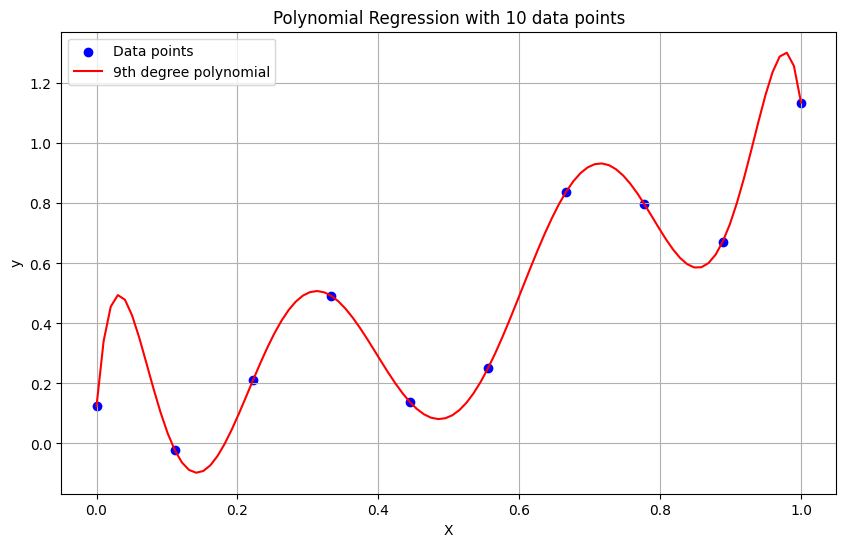

4.0646242744613365e-23

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)

X = np.linspace(0, 1, 10).reshape(10, 1)
y = X**2 + np.random.normal(0, 0.25, (10, 1))

poly_features = PolynomialFeatures(degree=9, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new = np.linspace(0, 1, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X_new, y_pred, color='red', label="9th degree polynomial")
plt.title("Polynomial Regression with 10 data points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

mse_10_points = mean_squared_error(y, lin_reg.predict(X_poly))

mse_10_points


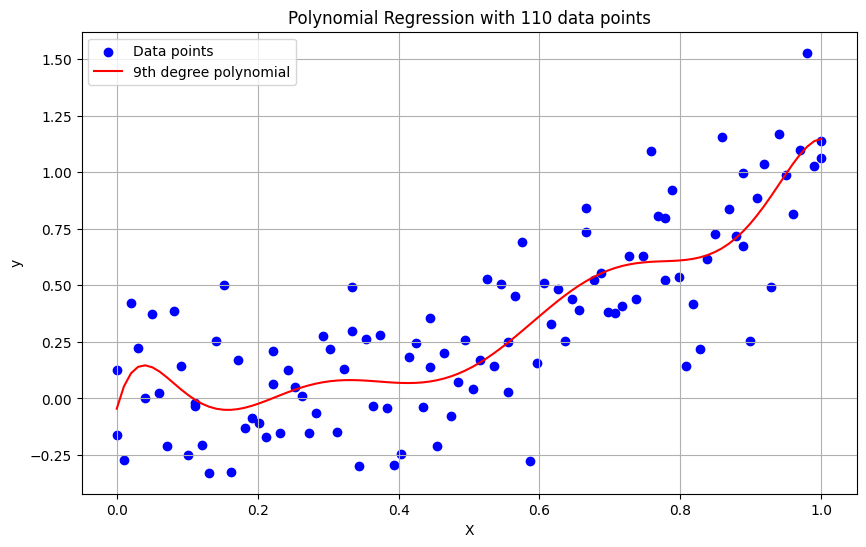

0.05180781512959939

In [15]:
X_additional = np.linspace(0, 1, 100).reshape(100, 1)
y_additional = X_additional**2 + np.random.normal(0, 0.25, (100, 1))

X_combined = np.vstack((X, X_additional))
y_combined = np.vstack((y, y_additional))

X_combined_poly = poly_features.fit_transform(X_combined)

lin_reg_combined = LinearRegression()
lin_reg_combined.fit(X_combined_poly, y_combined)

y_pred_combined = lin_reg_combined.predict(X_new_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_combined, y_combined, color='blue', label="Data points")
plt.plot(X_new, y_pred_combined, color='red', label="9th degree polynomial")
plt.title("Polynomial Regression with 110 data points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

mse_110_points = mean_squared_error(y_combined, lin_reg_combined.predict(X_combined_poly))

mse_110_points


Question 2: Code from scratch \
Implement the convolution function
- Input: X, W, stride, padding
- Output: Y \
Check again with the convolution function implemented in the Pytorch library

In [17]:
def convolution_2d(X, W, stride=1, padding=0):
    X_padded = np.pad(X, ((padding, padding), (padding, padding)), mode='constant')
    
    h_out = (X_padded.shape[0] - W.shape[0]) // stride + 1
    w_out = (X_padded.shape[1] - W.shape[1]) // stride + 1
    
    Y = np.zeros((h_out, w_out))
    
    for i in range(0, h_out * stride, stride):
        for j in range(0, w_out * stride, stride):
            Y[i // stride, j // stride] = np.sum(X_padded[i:i+W.shape[0], j:j+W.shape[1]] * W)
            
    return Y

X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

W = np.array([[1, 0],
              [0, -1]])

Y_my_conv = convolution_2d(X, W, stride=1, padding=0)

import torch
import torch.nn.functional as F

X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  
W_tensor = torch.tensor(W, dtype=torch.float32).unsqueeze(0).unsqueeze(0) 

Y_torch_conv = F.conv2d(X_tensor, W_tensor, stride=1, padding=0)

Y_my_conv, Y_torch_conv.squeeze().numpy()


(array([[-4., -4.],
        [-4., -4.]]),
 array([[-4., -4.],
        [-4., -4.]], dtype=float32))

Question 3:
Given dataset CIFAR-10
- Implement a model similar to VGG16 (maybe shallower) with the above data using Pytorch
- Adjust the learning rate, draw the corresponding loss graph.
- Divide the train/test set in 80/20 ratio, calculate the accuracy, recall, f1-score indexes on the test set.
